In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

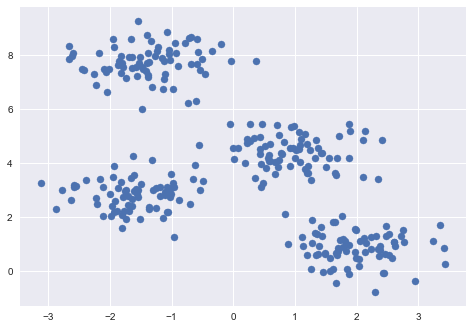

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Calculate the RSS:

In [6]:
def residual_sum_of_squares(x_vals, y_vals, classes, centers):
    rss = 0.0
    center = [0,0]
    for x,y,c in zip(x_vals, y_vals, classes):
        center = centers[c]
        rss += (center[0]-x)**2 + (center[1]-y)**2
        
    return rss

In [16]:
from sklearn.cluster import KMeans
import math

best_AIC = math.inf

results = []

for k in range(15,25+1): 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    classes = kmeans.predict(X)
    rss = kmeans.inertia_
    aic = rss + 40 * k
    
    results.append((k,aic))
    
    if aic < best_AIC:
        best_AIC = aic
        best_k = k
    
print("Best result: k="+str(best_k)+" AIC="+str(best_AIC))
print(results)

Best result: k=15 AIC=673.21674628
[(15, 673.21674628027199), (16, 709.09764635525516), (17, 743.87782060564177), (18, 779.6729098774872), (19, 816.67908492291485), (20, 853.07523973675188), (21, 891.09242049710087), (22, 928.04341388114756), (23, 967.02031693113099), (24, 1004.8221764441279), (25, 1042.9117466501207)]


[[-1.58438467  2.83081263]
 [-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]]
[[-1.58438467  2.83081263]]


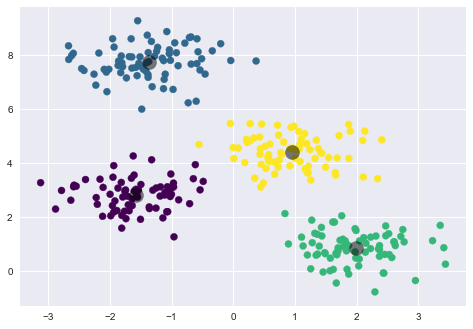

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

print(centers);
print(centers[:1]);


The good news is that the *k*-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye.

But you might wonder how this algorithm finds these clusters so quickly! After all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly.

Fortunately for us, such an exhaustive search is not necessary: instead, the typical approach to *k*-means involves an intuitive iterative approach known as *expectation–maximization* as discussed in the lecture.

## k-Means Algorithm: Expectation–Maximization

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science.
*k*-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.
In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to.
The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

We can visualize the algorithm as shown in the following figure.
For the particular initialization shown here, the clusters converge in just three iterations.

The *k*-Means algorithm is simple enough that we can write it in a few lines of code.
The following is a very basic implementation:

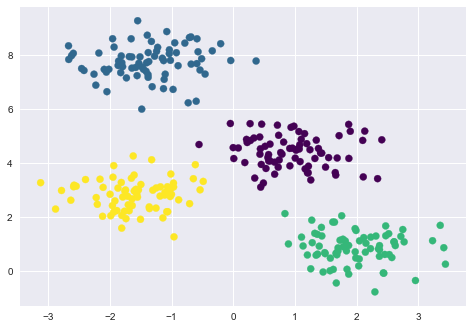

In [6]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Most well-tested implementations will do a bit more than this under the hood, but the preceding function gives the gist of the expectation–maximization approach.